<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Knn_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import numpy as np


Load IRIS database and do K-NN clasification.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


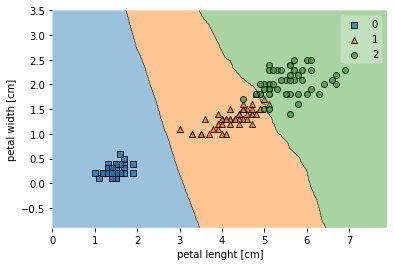

In [47]:
X, y = load_iris(return_X_y=True)
knn_model = KNeighborsClassifier(n_neighbors=30, p=2)
knn_model.fit(X[:,2:], y)
plot_decision_regions(X[:,2:], y, knn_model)
plt.xlabel('petal lenght [cm]')
plt.ylabel('petal width [cm]')
plt.show()

In [52]:
y_pred = knn_model.predict(X[:,2:])
print("Number of mislabeled points out of a total %d points : %d"  % (X.shape[0], (y != y_pred).sum()))
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y,y_pred)))


Number of mislabeled points out of a total 150 points : 6
Accuracy score from sklearn library:= 96.00 


Let's check the accuracy for a range of K 2-50

In [42]:
k_range = range(2,50)
scores ={}
scores_list =[]
for k in k_range:
  k_nn = KNeighborsClassifier(n_neighbors=k, p=3)
  k_nn.fit(X, y)
  y_pred = k_nn.predict(X)
  scores[k]=metrics.accuracy_score(y,y_pred)
  scores_list.append(metrics.accuracy_score(y,y_pred))



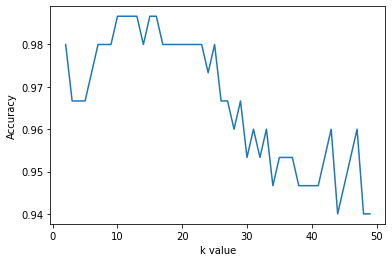

In [43]:
plt.plot(k_range, scores_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()

Let's do in correct way by spliting data into training, validation and testing sets with stratified spliting


In [80]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)
np.bincount(y_temp)

array([40, 40, 40])

In [81]:
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, shuffle=True, stratify=y_temp)
X_train.shape

(96, 4)

Scaling data by normalisation.


In [82]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)

X_train_std=(X_train -mu)/sigma
X_test_std=(X_test -mu)/sigma
X_valid_std=(X_valid -mu)/sigma

In [83]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)
X_valid_mm=scaler.transform(X_valid)

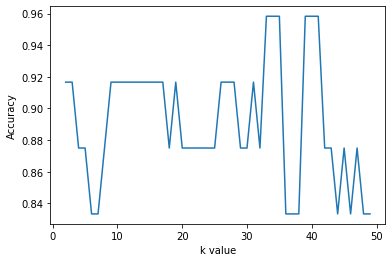

a= 31
best k= 33
Accuracy score from sklearn library:= 83.33 


In [85]:
k_range = range(2,50)
scores ={}
scores_list =[]
P_val=3
for k in k_range:
  k_nn = KNeighborsClassifier(n_neighbors=k, p=P_val)
  k_nn.fit(X_train, y_train)
  y_pred = k_nn.predict(X_valid)
  scores[k]=metrics.accuracy_score(y_valid,y_pred)
  scores_list.append(metrics.accuracy_score(y_valid,y_pred))

plt.plot(k_range, scores_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()
a=np.argmax(scores_list)
print('a=', a)
best_k=k_range[a]
print('best k=', best_k)

k_nn = KNeighborsClassifier(n_neighbors=best_k, p=P_val)
k_nn.fit(X_train, y_train)
y_pred = k_nn.predict(X_test)
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y_test,y_pred)))

With STANDARTISATION STD

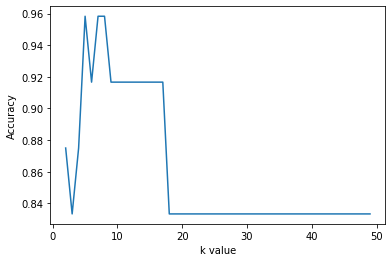

a= 3
best k= 5
Accuracy score from sklearn library:= 96.67 


In [86]:
k_range = range(2,50)
scores ={}
scores_list =[]
P_val=3
for k in k_range:
  k_nn = KNeighborsClassifier(n_neighbors=k, p=P_val)
  k_nn.fit(X_train_std, y_train)
  y_pred = k_nn.predict(X_valid_std)
  scores[k]=metrics.accuracy_score(y_valid,y_pred)
  scores_list.append(metrics.accuracy_score(y_valid,y_pred))

plt.plot(k_range, scores_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()
a=np.argmax(scores_list)
print('a=', a)
best_k=k_range[a]
print('best k=', best_k)

k_nn = KNeighborsClassifier(n_neighbors=best_k, p=P_val)
k_nn.fit(X_train_std, y_train)
y_pred = k_nn.predict(X_test_std)
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y_test,y_pred)))

MIN-MAX scaling

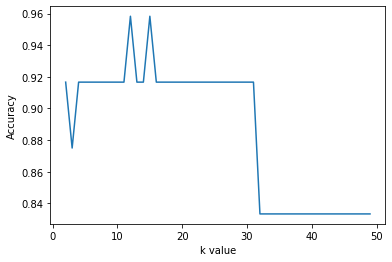

a= 10
best k= 12
Accuracy score from sklearn library:= 96.67 


In [87]:
k_range = range(2,50)
scores ={}
scores_list =[]
P_val=3
for k in k_range:
  k_nn = KNeighborsClassifier(n_neighbors=k, p=P_val)
  k_nn.fit(X_train_mm, y_train)
  y_pred = k_nn.predict(X_valid_mm)
  scores[k]=metrics.accuracy_score(y_valid,y_pred)
  scores_list.append(metrics.accuracy_score(y_valid,y_pred))

plt.plot(k_range, scores_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()
a=np.argmax(scores_list)
print('a=', a)
best_k=k_range[a]
print('best k=', best_k)

k_nn = KNeighborsClassifier(n_neighbors=best_k, p=P_val)
k_nn.fit(X_train_mm, y_train)
y_pred = k_nn.predict(X_test_mm)
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y_test,y_pred)))